<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/ML%20course%20with%20Python/Medical_Insurance_Cost_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import packages#
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
#load dataset
insuarance_data = pd.read_csv("/content/insurance.csv")
insuarance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insuarance_data.shape

(1338, 7)

In [6]:
insuarance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insuarance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#analyse the data
insuarance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-13-b4320f3185b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_data["age"])


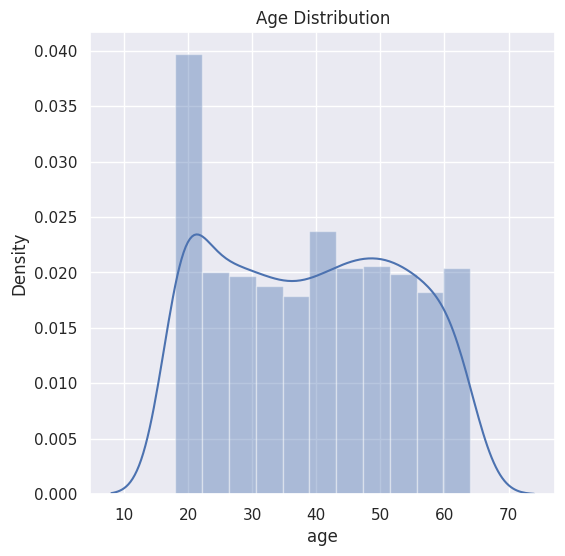

In [13]:
#Age distribution
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(insuarance_data["age"])
plt.title("Age Distribution")
plt.show()

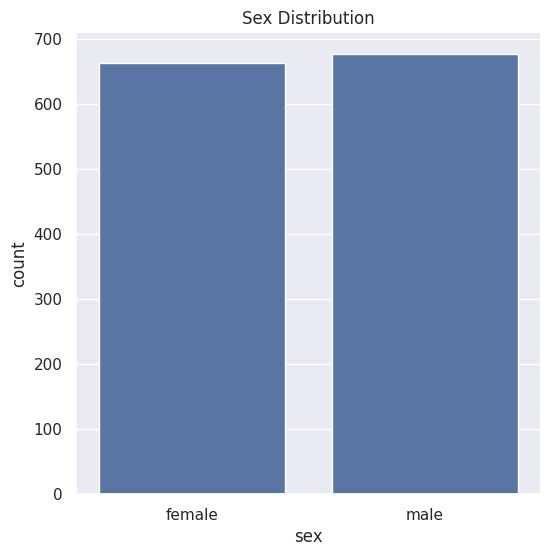

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=insuarance_data)
plt.title("Sex Distribution")
plt.show()

<ipython-input-15-8f6f4338e69d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_data["bmi"])


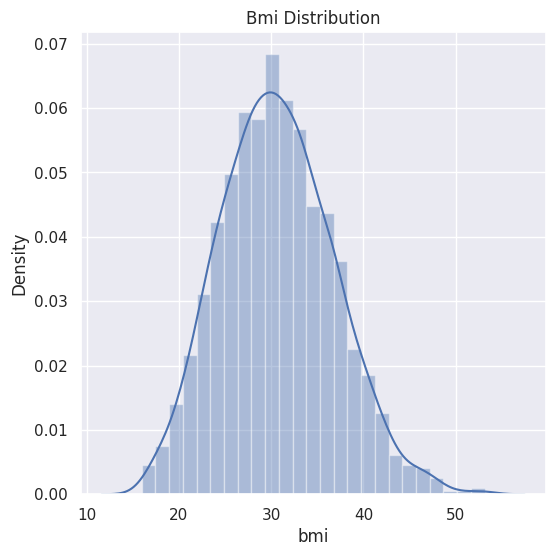

In [15]:
#bmi distribution
plt.figure(figsize=(6, 6))
sns.distplot(insuarance_data["bmi"])
plt.title("Bmi Distribution")
plt.show()

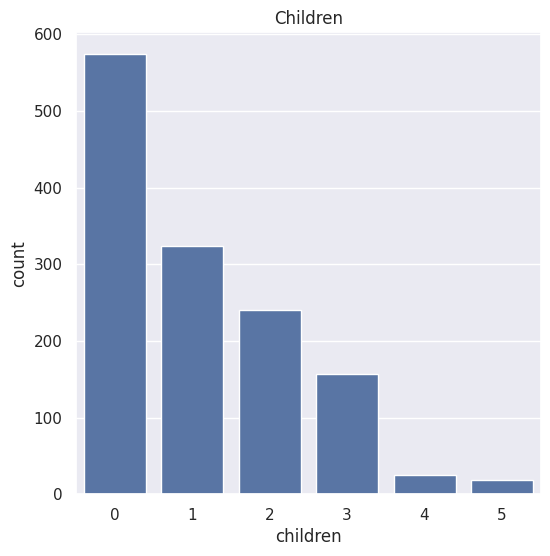

In [17]:
#children count
plt.figure(figsize=(6, 6))
sns.countplot(x="children", data=insuarance_data)
plt.title("Children")
plt.show()

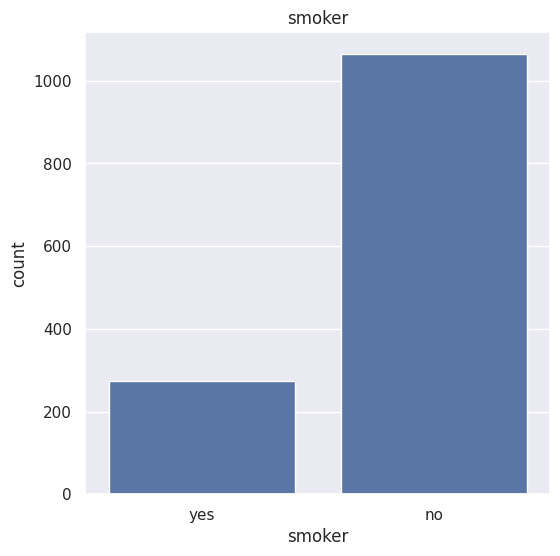

In [18]:
#gender count
plt.figure(figsize=(6, 6))
sns.countplot(x="smoker", data=insuarance_data)
plt.title("smoker")
plt.show()

In [19]:
insuarance_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

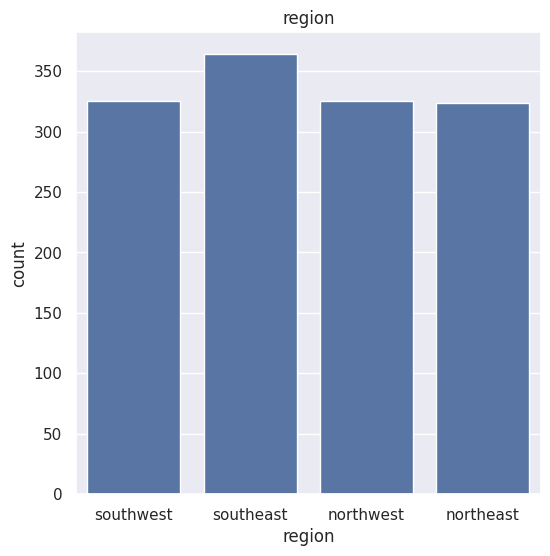

In [20]:
#region count
plt.figure(figsize=(6, 6))
sns.countplot(x="region", data=insuarance_data)
plt.title("region")
plt.show()

In [21]:
insuarance_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-23-24d7856fe71a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_data["charges"])


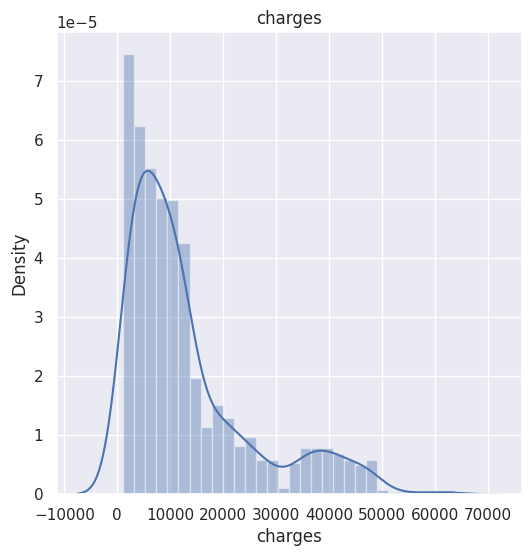

In [23]:
#charges count
plt.figure(figsize=(6, 6))
sns.distplot(insuarance_data["charges"])
plt.title("charges")
plt.show()

In [25]:
#encode categorical data
insuarance_data.replace({"sex": {"male": 0, "female": 1}}, inplace=True)
insuarance_data.replace({"smoker": {"no": 0, "yes": 1}}, inplace=True)
insuarance_data.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest":3}}, inplace=True)
insuarance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [27]:
X = insuarance_data.drop(columns="charges", axis=1)
Y = insuarance_data["charges"]
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [29]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
training_data_prediction = model.predict(X_train)
training_data_r2_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared on training data: ", training_data_r2_score)

R Squared on training data:  0.751505643411174


In [34]:
test_data_prediction = model.predict(X_test)
test_data_r2_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared on test data: ", test_data_r2_score)

R Squared on test data:  0.7447273869684076


In [37]:
input_data = (31, 1, 25, 74, 0, 1)
input_as_np_array = np.asarray(input_data)
input_data_reshaped = input_as_np_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print("The insuarance cost is USD", prediction[0])


The insuarance cost is USD 46667.92902789409


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
